<a href="https://colab.research.google.com/github/reitezuz/notebooks-for-NES2-2024/blob/main/lecture_04/binary_classification_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary classification example - classifying movie reviews from the IMDB dataset


Based on: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb




In [2]:
# Load the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()



Observe the data:

In [3]:
import numpy as np

# 25000 training samples - movie reviews.
print(train_data.shape, train_labels.shape)

# 25000 testing samples - movie reviews.
print(test_data.shape, test_labels.shape)

# 2 categories: positive / negative sentinent
print(train_labels[:10])

print(train_data[1])

# 88586 most common words
dimension = max([max(sequence) for sequence in train_data])+1
print(dimension)

# Distribution of training and testing labels
print("Training Label distribution:", np.bincount(train_labels))
print("Testing Label distribution:", np.bincount(test_labels))



(25000,) (25000,)
(25000,) (25000,)
[1 0 0 1 0 0 1 0 1 0]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 10156, 4, 1153, 9, 194, 775, 7, 8255, 11596, 349, 2637, 148, 605, 15358, 8003, 15, 123, 125, 68, 23141, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 36893, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 25249, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 46151, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
88587
Training Label distribution: [12500 12500]
Testing Label distribution: [1250

Example of a review in the training data:

In [4]:
# Get the word index from the IMDB dataset.
# This is a dictionary mapping words to integers.
word_index = imdb.get_word_index()

# Create a reverse word index, mapping integers back to words.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode the first review in the training data.
# Subtract 3 from each index to account for special tokens (padding, start of sequence, unknown).
# Replace any unknown words with '?'.
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Print the decoded review.
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be

# Preprocess the data

In [5]:
# 1. Vectorize the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            if j < dimension:
              results[i, j] = 1.
    return results

x_train_ext = vectorize_sequences(train_data)  # Vectorize training data
x_test = vectorize_sequences(test_data)    # Vectorize testing data

y_train_ext = np.asarray(train_labels).astype('float32')  # Vectorize training labels
y_test = np.asarray(test_labels).astype('float32')    # Vectorize testing labels


# 2. Split the training data into training and validation sets
# The validation set is used to monitor the performance of the model during training and prevent overfitting.
x_val = x_train_ext[:10000]
x_train = x_train_ext[10000:]
y_val = y_train_ext[:10000]
y_train = y_train_ext[10000:]
y_train = y_train.reshape(-1, 1)  # Reshape to match output shape
y_val = y_val.reshape(-1, 1)      # Reshape to match output shape
y_test = y_test.reshape(-1, 1)      # Reshape to match output shape


print(x_train[0], x_train.shape, y_train[0])

[0. 1. 0. ... 0. 0. 0.] (15000, 10000) [0.]


# Define the model

In [6]:
import keras

# define the model architecture
model = keras.Sequential([
    keras.layers.InputLayer(shape=(10000,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # output layer
])

model.summary()

# Set model parameters
model.compile(optimizer= keras.optimizers.RMSprop(learning_rate=0.001),
              loss= keras.losses.BinaryCrossentropy(),
              metrics= [keras.metrics.BinaryAccuracy()])

# Train the model
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - binary_accuracy: 0.6979 - loss: 0.6107 - val_binary_accuracy: 0.8655 - val_loss: 0.4246
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - binary_accuracy: 0.8907 - loss: 0.3678 - val_binary_accuracy: 0.8743 - val_loss: 0.3339
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - binary_accuracy: 0.9105 - loss: 0.2720 - val_binary_accuracy: 0.8890 - val_loss: 0.2906
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - binary_accuracy: 0.9360 - loss: 0.2101 - val_binary_accuracy: 0.8851 - val_loss: 0.2871
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - binary_accuracy: 0.9429 - loss: 0.1775 - val_binary_accuracy: 0.8825 - val_loss: 0.2922
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - binary_accuracy: 0.9527 - loss: 0.1515 - val_binary_accuracy: 0.8893 - val_loss: 0.2785
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - binary_accuracy: 0.9609 - loss: 0.1315 - val_binary_accuracy: 0.8844 - val_loss: 0.2888
Epoch 8/20
3

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])


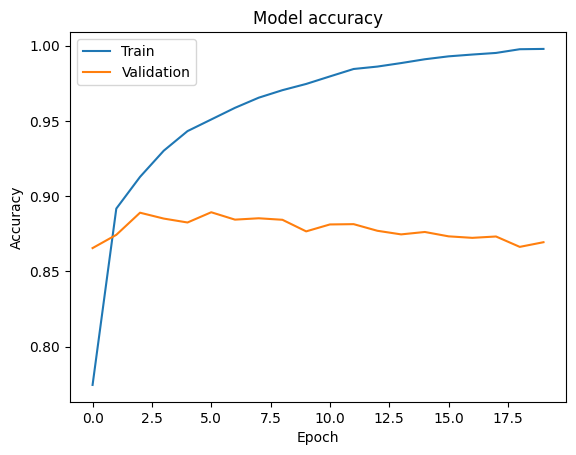

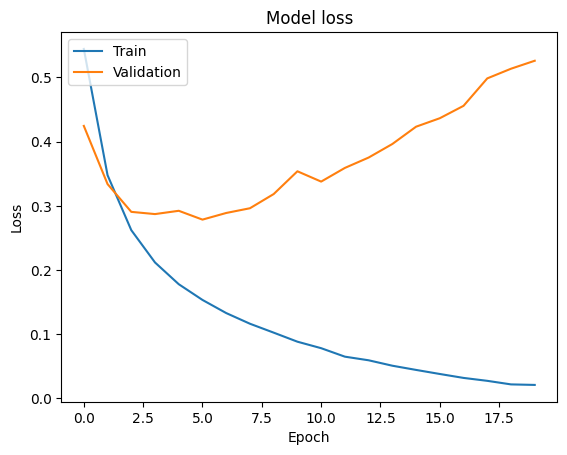

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8531 - loss: 0.5844
Test accuracy: 0.856719970703125 
Test loss: 0.5717962980270386


In [7]:
# plot the training progress:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())


# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)